# Space Titanic Challenge [Kaggle] 

Dataset provided : train.csv , test.csv 

#### Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

##### loading the data from csv files

In [3]:
Train_file = pd.read_csv('Data\\train.csv')

Test_file = pd.read_csv('Data\\test.csv')

### Data Preprocessing

In [4]:
print(Train_file.columns)
print(Test_file.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [5]:
Train_file.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

##### Checking for missing values in train and test datasets

In [6]:
def check_missing_data(df):
    missing_data = df.isnull().melt(value_name='missing')
    sns.displot(missing_data , y = 'variable', hue='missing' , multiple='fill' , aspect=1.1)
    plt.title('Missing Data in Dataframe')
    plt.xlabel('Probability(Count)')
    plt.ylabel('Features')
    plt.show()

###### Train file

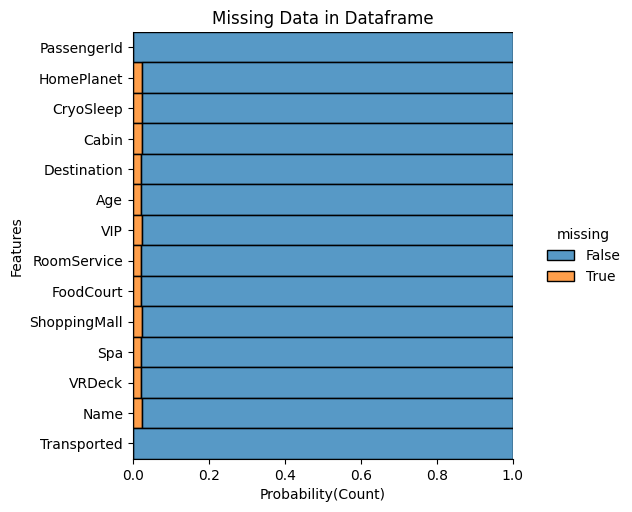

In [7]:
check_missing_data(Train_file)

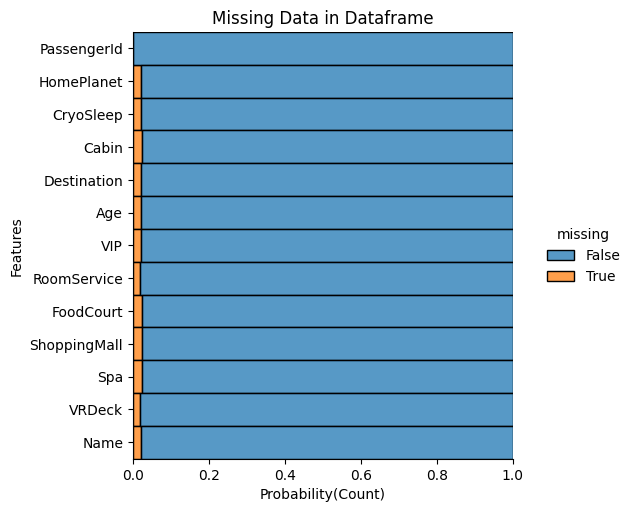

In [8]:
check_missing_data(Test_file)

#### Removing Missing Values and converting catagorical features to numeric and generating a new train and test dataset

In [9]:
dp = ['PassengerId' , 'Cabin' , 'Name'] ## Columns to drop selected randomly (since I'm a beginner)
cata_features = ['HomePlanet' , 'Destination'] ## catagorical features
bfet = ['CryoSleep' , 'VIP' ,'Transported'] ## Boolean features

In [10]:
def remove_nan_cata(df , ct_fet , drop_cols , already_dropped=False):
    ode = OrdinalEncoder()
    imp_mean = SimpleImputer(strategy='mean')
    ndf = df.drop(drop_cols , axis=1) ## dropping cols not needed
    fet = ndf.columns
    if already_dropped:
       for i in ct_fet:
           df[i] = ode.fit_transform(df[[i]]) ## catagorical to numerical
    else:
        for i in ct_fet:
           ndf[i] = ode.fit_transform(ndf[[i]]) 
           
    for i in range(len(fet)):
        ndf[fet[i]] = imp_mean.fit_transform(ndf[[fet[i]]]) ## Filling missing data   
    return ndf

In [11]:
ntrainset = remove_nan_cata(Train_file , cata_features , dp , False)
ntestset = remove_nan_cata(Test_file , cata_features , dp , False)

In [12]:
ntrainset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [13]:
ntestset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0


In [14]:
print(ntrainset.shape)
print(ntestset.shape)

(8693, 11)
(4277, 10)


In [15]:
print(ntrainset.dtypes)
print(ntestset.dtypes)

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported     float64
dtype: object
HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


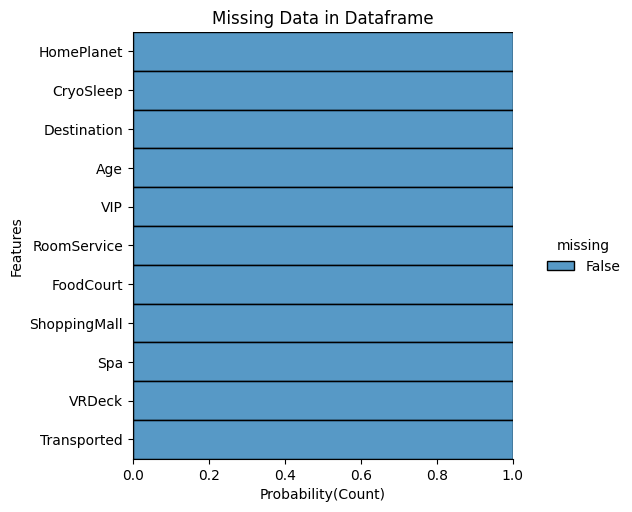

In [16]:
check_missing_data(ntrainset)

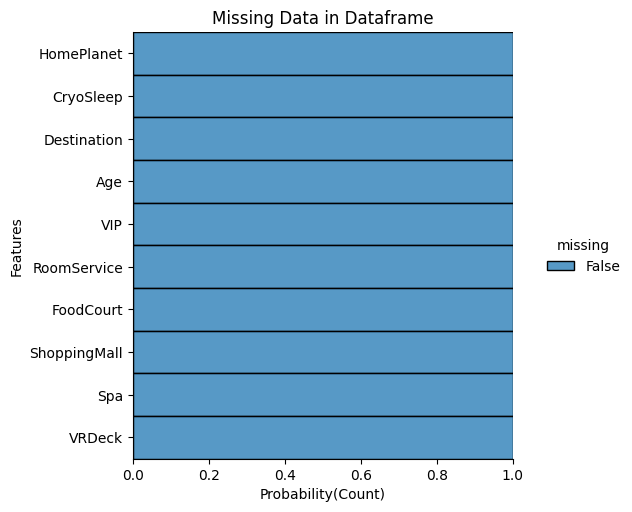

In [17]:
check_missing_data(ntestset)

Since no , orange label i.e missing = True , so the nan is filled! No missing data. 

##### Dividing the train dataset into Validation dataset , dividing 70-30%  ratio 

In [18]:
split_at = int(len(ntrainset)*0.7)

In [19]:
train = ntrainset[:split_at]

valid = ntrainset[split_at:]

In [20]:
print(ntrainset.shape)
print(train.shape)
print(valid.shape)

(8693, 11)
(6085, 11)
(2608, 11)


In [21]:
valid.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
6085,0.0,0.0,0.0,27.0,0.0,30.0,0.0,763.0,0.0,57.0,0.0
6086,1.0,0.0,0.0,55.0,0.0,114.0,222.0,0.0,2575.0,2919.0,0.0
6087,2.0,0.0,0.0,53.0,0.0,83.0,0.0,1590.0,60.0,0.0,1.0
6088,2.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6089,0.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
ntrainset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [23]:
missing_cols = set(ntrainset) - set(ntestset)
print(missing_cols)

{'Transported'}


##### Checking the need to oversample the train dataset or not  

In [24]:
len(train['Transported']== 1)

6085

In [25]:
len(train['Transported']== 0)

6085

Since the number of datapoints when the person is transported = number of datapoints when the a person isn't transported 

since transported = not transported  oversampling or undersampling of the training data isn't needed! 

##### Scaling and balancing imbalanced datasets

In [26]:
def scale_train_vaild(df , oversample=False):
    X = df.drop(df.columns[-1] , axis=1).values
    y = df[df.columns[-1]].values
    print(X.shape)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X , y = ros.fit_resample(X , y)

    return X , y

In [27]:
X_train , y_train = scale_train_vaild(train , oversample=False)

(6085, 10)


In [28]:
print(X_train.shape)
print(y_train.shape)

(6085, 10)
(6085,)


In [29]:
X_valid , y_valid = scale_train_vaild(valid , oversample=False)

(2608, 10)


In [30]:
print(X_valid.shape)
print(y_valid.shape)

(2608, 10)
(2608,)


In [31]:
def scale_test(df):
    X = df[df.columns].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X

In [32]:
X_test = scale_test(ntestset)

In [33]:
print(X_train.shape)
print(X_test.shape)

(6085, 10)
(4277, 10)


## Learning (Training the data with different models and Testing out a suitable model for validation)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

##### Model : Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb_model = GaussianNB()

nb_model = nb_model.fit(X_train , y_train) ## training naive bayes model with training dataset

In [37]:
nb_y_vpredict = nb_model.predict(X_valid)

In [38]:
print(classification_report(y_valid , nb_y_vpredict))

              precision    recall  f1-score   support

         0.0       0.88      0.44      0.59      1323
         1.0       0.62      0.94      0.75      1285

    accuracy                           0.69      2608
   macro avg       0.75      0.69      0.67      2608
weighted avg       0.75      0.69      0.67      2608



In [39]:
accuracy_score(y_valid , nb_y_vpredict)

0.6875

##### Model : Knn

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)  ## trainning knn model with training dataset

KNeighborsClassifier()

In [42]:
knn_y_vpredict = knn.predict(X_valid)

In [43]:
print(classification_report(y_valid , knn_y_vpredict))

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78      1323
         1.0       0.76      0.81      0.79      1285

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [44]:
accuracy_score(y_valid , knn_y_vpredict)

0.781441717791411

Since I know only two now models now , 
I choose knn model because it's giving 78% accuracy instead of naive bayes model giving 68% accuracy.

##### Using the selected model with Testing dataset values 

In [45]:
ktest_predict_y = knn.predict(X_test)

#### Creating a submission csv file containing test predictions and Passenger ids 

###### Converting back 0 and 1  as False and True 

In [46]:
y_prediction = ktest_predict_y.astype(bool)
print(y_prediction)

[ True False  True ...  True  True  True]


###### Creating a dataframe with PassengerIds and y predicts from test data

In [47]:
test_ids = Test_file[Test_file.columns[0]].values
print(test_ids)

['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']


In [48]:
sub_df = pd.DataFrame(data=[test_ids , y_prediction], index=None).T
sub_df.columns = ['PassengerId' , 'Transported']

In [49]:
sub_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


###### Converting dataframe to a csv file 

In [50]:
#sub_df.to_csv('submission.csv' , index=False)